In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# [Problem 1] Obtaining a dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# [Problem 2] Investigating the dataset itself

In [4]:
There are 79 explanatory variables that describe all aspects of a home in Ames, Ios, this competition requires predicting the final price of each home. We will consider how much the variable, such as [street] [alley] such as near the main road or railroad, [release year], etc., affects the objective variable (house price).

SyntaxError: invalid syntax (<ipython-input-4-37181e94d01b>, line 1)

# [Problem 3] Checking the data

* See what each feature is about. (Numerical data or text data, etc.)
* Check which column is the target variable this time.<br>
* Display the mean, standard deviation, and quartiles of the feature values at once.<br>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

** The column SalePrice is the price of the house and is the objective variable. According to the competition page, the unit is dollars. **

In [7]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Display the mean, standard deviation, and quartiles of the feature values at once.

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# [Problem 4] Dealing with missing values

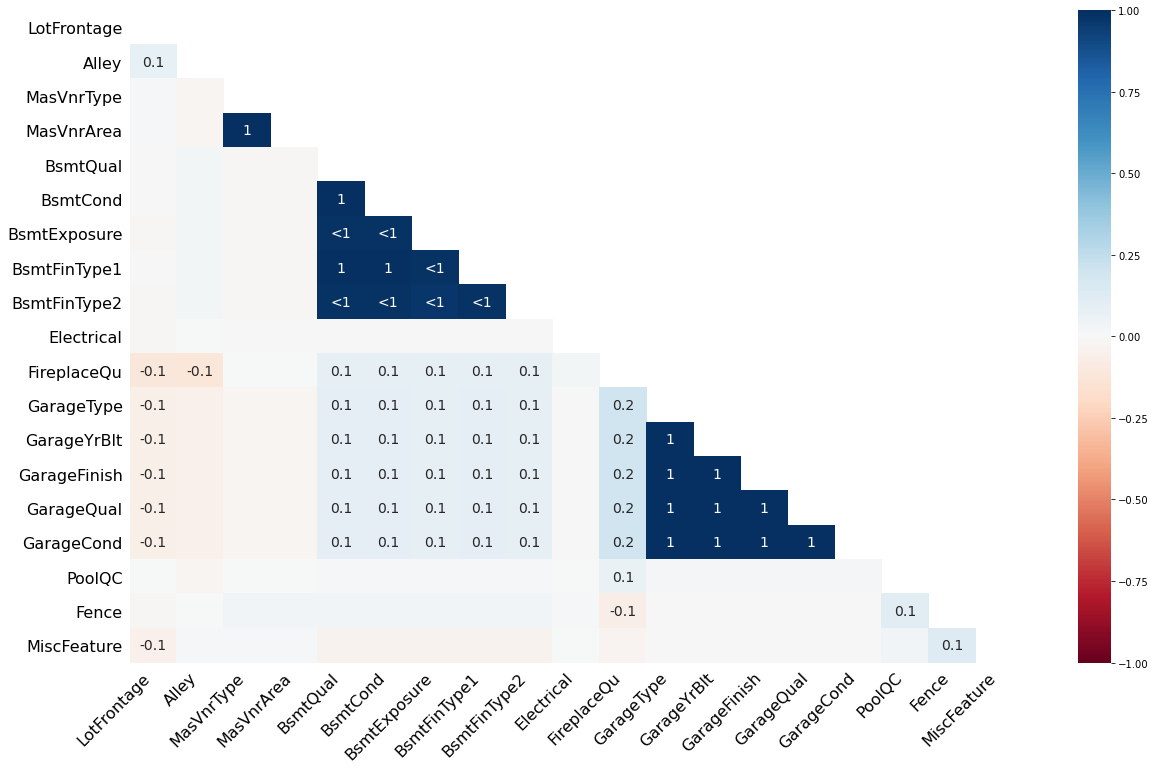

In [16]:
import missingno as msno
msno.heatmap(df)

In [21]:

df_total_null = df.isnull().sum()
df_percent_null = df_total_null / len(df)
df_null = pd.DataFrame({"Total": df_total_null, "missing_ratio": df_percent_null})
#Shot only which is null
df_null[df_null["Total"] > 0]

,Total,missing_ratio
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


In [38]:
df_dropped = df.drop((df_null[df_null["Total"] > 5]).index , axis=1)

In [28]:
df = df_dropped.dropna()
display(df)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# [Problem 5] Researching terminology


Examine the kurtosis and skewness.

* Kurtosis: A numerical value that indicates how much the distribution is distorted from the normal distribution. When the data is concentrated near the mean value than the normal distribution and there is little data away from the mean value, it takes a positive value, it is called "long right hem", "distorted to the right", or "biased to the left" and when the data is not near the mean value than the normal distribution and there are many data away from the mean value. Take a negative value. It is 0 for a symmetrical distribution (e.g. a normal distribution).

* Skewness: A statistic that shows how sharp the distribution is from the normal distribution, which indicates the sharpness of the peaks and the spread of the tail. When the distribution is heavier), it takes a positive value, and when the distribution is flatter than the normal distribution (data is scattered from near the mean and the tail of the distribution is light), it takes a negative value. 0 for a normal distribution.

# [Problem 6] Confirming distribution

* Use seaborn's sns.distplot () to display the distribution of the target variable and also calculate the "kurtosis" and "skewness".
* Perform a logarithmic transformation on the objective variable.
* The distribution is displayed for the logarithmically transformed one, and the "kurtosis" and "skewness" are also calculated.

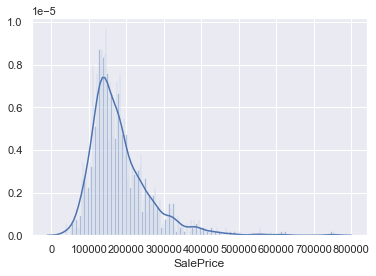

In [11]:
df_sale = df["SalePrice"]
sns.distplot(df_sale, bins=200)
sns.set()

In [15]:
print('Kurtosis: ', df_sale.kurt())
print('Skewness: ', df_sale.skew())

Kurtosis:  6.536281860064529
Skewness:  1.8828757597682129


Logarithmic conversion is performed on the objective variable, the distribution is drawn in the same way, and the skewness and kurtosis are changed trmedously.

Kurtosis:  0.8095319958036296
Skewness:  0.12133506220520406


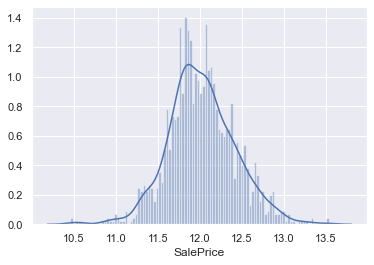

In [16]:
df_sale_log = df_sale.apply(np.log)
sns.distplot(df_sale_log, bins=100)
sns.set()
print('Kurtosis: ', df_sale_log.kurt())
print('Skewness: ', df_sale_log.skew())

The kurtosis changed from 6.536 to 0.81 after logarithmic transformation. The Kurtosis value approached 0, which is a normal distribution, and the kurtosis became nearly zero, which is also tends to be normally distributed.

# [Problem 7] Confirming the correlation coefficient

* Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients.
* Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.
* Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.
* Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.

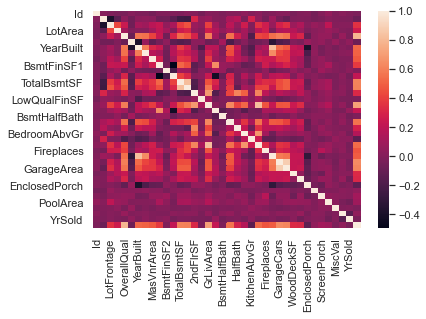

In [18]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [21]:
df_corr_saleprice = df_corr["SalePrice"].sort_values(ascending = False)

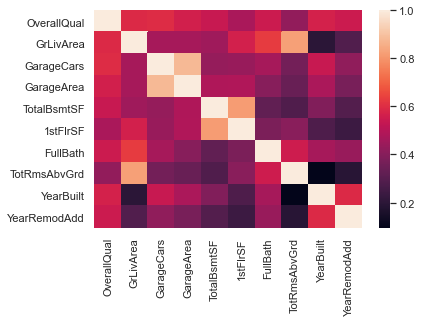

In [28]:
df_sale_top10 = df[df_corr_saleprice[1:11].index]
df_sale_top10_corr = df_sale_top10.corr()
sns.heatmap(df_sale_top10_corr)
plt.show()

Referring to Kaggle's Data Description description.
The following three have a strong relationship with Sale Price.

OverRallQual (overall material and finish quality)
GrLivArea (living area on the ground)
Garage Cars
The combinations with high correlation coefficient values ​​are as follows.

Garage Area: Garage cars
TotRmsAbvGrd (total number of rooms excluding bathroom): GrLivArea (living area on the ground)
TotalBsmtSF (total area of ​​basement): 1stFlrSF (total area of ​​1st floor)
The number of cars to put in breadth and garage of the garage is a good one either for the same meaning (metric only a few of the differences between the area or car).
Although the measurement standards for the number of rooms excluding the bathroom and the area of ​​the living room are different, they are the same in the sense that "the more rooms there are, the larger the area will be."

However, it is a little disappointing that the strong relationship with the price of the house was the obvious result of the overall quality and the size of the room (and garage).

TotRmsAbvGrd, GrLivArea: Basically, a house with a large living room tends to be a large house. And vice versa. Therefore, it is considered that the number of rooms and the size of the living room are highly correlated.

GarageCars, GarageArea: Both are data on the size of the garage, so it is natural that the correlation is high.

TotalBsmtSF, 1stFlrSF: The first floor, which is the base of the building, is considered to have the largest area. Therefore, it is considered that the area of ​​the first floor and the size of the entire site are highly correlated